<a href="https://colab.research.google.com/github/MamadouBousso/Cours-Python/blob/main/Lecture_Fichiers_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
<center><h1> FICHIERS CSV</h1></center>

---

*** Dans ce notebook, nous verrons comment lire les fichiers "CSV" et comment resoudre les différents défis auxquels nous sommes confrontés lors de leurs lectures.***

---


- ***`Pandas` est l'une des bibliothèques les plus utilisées pour lire des ensembles de données. Dans ce cours, nous allons l'utiliser.***
-  Lire encore plus sur Pandas: ***https://pandas.pydata.org/pandas-docs/stable/index.html***

--- 

***Installer pandas avec les commandes ci-dessous:*** 

En utilisant anaconda avec python3: ***`!pip install pandas`***

En utilisant jupyter avec python3: ***`!pip3 install pandas`***

---

### `Table des matiéres`

- ***Lecture de fichiers  CSV ***
- ***Challenges avec la lecture de fichier CSV.***
     - Lire les données sauf les premières lignes du fichier.
     - Lire les fichiers présents dans plusieurs répertoires.
     - Vérifier, délimiter et lire le fichier.
     - Si le jeu de données est volumineux, nous  pouvons lire  quelques lignes.
     - Si le jeu de données a un grand nombre de colonnes, lire uniquement des colonnes spécifiques
    
    
    
   
    

---

#### `LECTURE DE FICHIERS CSV`

---

In [7]:
# importer sys pour gérer les chemins des fichiers et modules
import sys
# importer la librairie pandas
import pandas as pd

In [3]:
# Verifier la version utilisée
pd.__version__

'1.3.5'

---

***Lire le fichier `CSV` ***

**`Dataset utilisé:`**  L'ensemble de données que nous allons utiliser représente des données de vente. Il a été collecté par les data scientist de BigMart pour 1559 produits dans 10 magasins de villes différentes. Il contient des informations comme `Item Identifier`, `Outlet Size`, `Item MRP`, `Outlet Location Type`, `Item Outlet Sales` etc.

---

Ils sont dans le repertoire **`datasets`** sous le nom de **`big_mart_sales.csv`** de mon drive.

---

In [5]:
# Je monte mon drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* **Dans ce cas on peut copier le chemin et lire le fichier en utilisant le chemin**
* **On aussi au cas où on n'utilise pas le drive creer le repertoire datasets dans content et mettre les fichiers csv dedans**

In [9]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets/'
sys.path.append(dataset_path)

In [10]:
# lire le dataset
data = pd.read_csv(dataset_path +'big_mart_sales.csv')

In [11]:
type(data)

pandas.core.frame.DataFrame

---

***Les données sont stockées dans une structure de  type `DataFrame`***

***`DATAFRAME`***


- Un DataFrame est une structure de données bidimensionnelle avec des colonnes pouvant contenir différents types de données.
- Similaire à une feuille de calcul ou à une table SQL.
- C'est généralement l'objet pandas le plus utilisé.

In [12]:
# Pour visualiser les données on peut utiliser les commandes "head" ou "tail"
# head(n = "le nombre de lignes que vous voulez visualiser à partir du top")
# tail(n = "le nombre de lignes que vous voulez visualiser à partir du bas")

data.head()
# Permet de visualiser 5 lignes

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---

***Après avoir lu le jeu de données, la première chose que nous vérifions est la taille du jeu de données. Pour obtenir le nombre de lignes et de colonnes présentes dans l'ensemble de données, nous avons l'attribut `shape`.***

---

In [13]:
# Nous utilisons shape pour avoir les dimensions du jeu de données
data.shape

(8523, 12)

---


#### `CHALLENGES AVEC LA LECTURE DE FICHIER CSV`

    - Lire les données sauf les premières lignes du fichier.
    - Lire les fichiers présents dans plusieurs répertoires.
    - Vérifier, délimiter et lire le fichier.
    - Si le jeu de données est volumineux, nous  pouvons lire JUSTE quelques lignes.
    - Si le jeu de données a un grand nombre de colonnes, lire uniquement des colonnes spécifiques.
    


---

---

***Lire les données à l'exception de quelques lignes au top du fichier.***

- You may get an error while reading a CSV file because someone may have added few comments on the top of the file. In pandas we can still read the data set by skipping few rows from the top. 

- Vous pouvez obtenir une erreur lors de la lecture d'un fichier CSV car quelqu'un a peut-être ajouté quelques commentaires en haut du fichier. Avec pandas, nous pouvons toujours lire l'ensemble de données en sautant quelques lignes à partir du haut.


---

***Prenons l'exemple du `big_mart_sales_top_rows_error.csv` present dans le repertoire datasets.***

--- 

In [14]:
data_with_comments = pd.read_csv(dataset_path+'/big_mart_sales_top_row_error.csv')

ParserError: ignored

**texte en gras**---


- Pour gérer **l'erreur**, ouvrez le fichier csv dans l'éditeur de texte et vérifiez si vous avez des commentaires en haut.
- Si oui, alors comptez le nombre de lignes à sauter.
- En lisant le fichier, passer le nombre de lignes à sauter au parametre ***`skiprows = n (nombre de lignes à sauter)`***

---

In [16]:
# lire l'ensemble de données en sautant les 5 premiéres lignes
data_with_comments = pd.read_csv(dataset_path+'big_mart_sales_top_row_error.csv', skiprows= 5)

In [17]:
# visualiser les données
data_with_comments.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---

---

#### `LIRE DES FICHIERS REPARTIS SUR PLUSIEURS REPERTOIRES`



- Use the **`glob`** library to list the files in a directory


- Dans le repertoire **multi-directory**, nous avons divisé le même ensemble de données "par année" en plusieurs fichiers et les avons stockés dans plusieurs répertoires.

- On va utiliser la bibliothèque **`glob`** pour lister les fichiers dans un répertoire
---

In [18]:
# importer la librairie
import glob

In [21]:
# lister tous les sous-repertoires présents dans le repertoire
for directory in glob.glob(dataset_path+'/multi-directory/*'):
    print(directory)

/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets//multi-directory/2007
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets//multi-directory/1985
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets//multi-directory/2009
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets//multi-directory/1987
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets//multi-directory/1997
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets//multi-directory/1998
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets//multi-directory/1999
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets//multi-directory/2002
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets//multi-directory/2004


---

Tous les repertoires **`1985`**, **`1987`**, **`1997`**, **`1998`**, **`1999`**, **`2002`**, **`2004`**, **`2007`** and **`2009`** contiennent des fichiers CSV. Nous allons les parcourir et les concatener

---

In [22]:
# Parcourir chaque repertoire et voir ses fichiers
for directory in glob.glob(dataset_path+'multi-directory/*'):
    
    for files in glob.glob(directory + '/*'):
        print(files)

/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets/multi-directory/2007/2007.csv
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets/multi-directory/1985/1985.csv
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets/multi-directory/2009/2009.csv
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets/multi-directory/1987/1987.csv
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets/multi-directory/1997/1997.csv
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets/multi-directory/1998/1998.csv
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets/multi-directory/1999/1999.csv
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets/multi-directory/2002/2002.csv
/content/drive/MyDrive/Colab Notebooks/IntroMLAMAS2022/reading_csv/datasets/multi-directory/2004/2004.csv


---

***Concatener les fichiers.***

---

In [24]:
# Creer une liste de dataframe
data_frame_list = []

# parcourir chaque sous-repertoire
for directory in glob.glob(dataset_path +'multi-directory/*'):
    
    # Parcourir chaque fichier csv,
    for files in glob.glob(directory + '/*'):
        # lire et ajouter le dataframe dans la liste
        data_frame_list.append(pd.read_csv(files))

In [25]:
# concatener les dataframes
final_data = pd.concat(data_frame_list)

In [26]:
final_data.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
1,25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
2,53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704
3,54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656
4,73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,NaN,Tier 2,Supermarket Type1,2285.0256


---

#### `STOOCKER LE DATAFRAME DANS UN  CSV`

---

In [28]:
final_data.to_csv(dataset_path + 'merged_big_mart_sales.csv',index=False)

---

#### `Lire un fichier CSV avec un delimiteur spécifique`

---

---

- Par defaut, pandas considere le separateur  ***`,`*** comme delimiteur des fichiers CSV. Mais si le fichier  CSV a un autre  separateur comme ***`[;, \t ]`*** ceci doit être spécifié.



---

In [30]:
# lire les données
data_delimiter = pd.read_csv(dataset_path+'big_mart_sales_delimiter.csv')

In [31]:
# we can see that the seperator used in the CSV is tab `\t`
data_delimiter

,Item_Identifier\tItem_Weight\tItem_Fat_Content\tItem_Visibility\tItem_Type\tItem_MRP\tOutlet_Identifier\tOutlet_Establishment_Year\tOutlet_Size\tOutlet_Location_Type\tOutlet_Type\tItem_Outlet_Sales
0,FDA15\t9.3\tLow Fat\t0.016047301\tDairy\t249.8...
1,DRC01\t5.92\tRegular\t0.019278216\tSoft Drinks...
2,FDN15\t17.5\tLow Fat\t0.016760075\tMeat\t141.6...
3,FDX07\t19.2\tRegular\t0.0\tFruits and Vegetabl...
4,NCD19\t8.93\tLow Fat\t0.0\tHousehold\t53.8614\...
...,...
96,FDF41\t12.15\tLow Fat\t0.131383762\tFrozen Foo...
97,FDB56\t8.75\tRegular\t0.07461309\tFruits and V...
98,NCP18\t\tLow Fat\t0.028459761\tHousehold\t149....
99,FDB56\t8.75\tRegular\t0.07462720099999999\tFru...


In [34]:
# Relire le fichier en utilisant cette fois-ci le parametre `delimiter` et `\t`
data_delimiter = pd.read_csv(dataset_path+'big_mart_sales_delimiter.csv',delimiter='\t')

In [35]:
# visualiser les données
data_delimiter.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---

#### `LIRE LES PREMIERES 'N' LIGNES (QUAND LES DONNÉES SONT VOLUMINEUSES)`

---

In [36]:
# Specifier le nombre de lignes à lire
read_sample_from_data = pd.read_csv(dataset_path +'big_mart_sales.csv',nrows=100)

In [37]:
# shape des données
read_sample_from_data.shape

(100, 12)

In [38]:
# visualiser les données
read_sample_from_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---

#### `LIRE LES '100' PROCHAINES LIGNES`

---

In [41]:
data_100_200 = pd.read_csv(dataset_path+'big_mart_sales.csv',skiprows=101, nrows=100)


In [42]:
data_100_200.head()

,FDT28,13.3,Low Fat,0.063695084,Frozen Foods,151.0708,OUT045,2002,Unnamed: 8,Tier 2,Supermarket Type1,1805.6496
0,FDD10,NaN,Regular,0.045798,Snack Foods,178.5344,OUT027,1985,Medium,Tier 3,Supermarket Type3,2854.9504
1,FDW57,8.31,Regular,0.115857,Snack Foods,179.1028,OUT049,1999,Medium,Tier 1,Supermarket Type1,3896.2616
2,DRB48,16.75,Regular,0.024833,Soft Drinks,38.7822,OUT013,1987,High,Tier 3,Supermarket Type1,667.7974
3,FDP09,19.75,Low Fat,0.034028,Snack Foods,212.0902,OUT018,2009,Medium,Tier 3,Supermarket Type2,3185.8530
4,FDH14,17.10,Regular,0.046770,Canned,141.1838,OUT013,1987,High,Tier 3,Supermarket Type1,2247.7408


---

#### `LIRE DES COLONNES SPECIFIQUES`


- Si l'ensemble de données comporte un grand nombre de colonnes, il est impossible de toutes les parcourir en une seule fois, nous ne pouvons donc lire que des colonnes spécifiques à la fois.

----

In [39]:
# Lire des colonnes specifiques
read_specific_columns = pd.read_csv(dataset_path+ 'big_mart_sales.csv', usecols= ['Item_Identifier', 
                                                                             'Item_Type',
                                                                             'Item_MRP',
                                                                             'Item_Outlet_Sales'])
read_specific_columns

,Item_Identifier,Item_Type,Item_MRP,Item_Outlet_Sales
0,FDA15,Dairy,249.8092,3735.1380
1,DRC01,Soft Drinks,48.2692,443.4228
2,FDN15,Meat,141.6180,2097.2700
3,FDX07,Fruits and Vegetables,182.0950,732.3800
4,NCD19,Household,53.8614,994.7052
...,...,...,...,...
8518,FDF22,Snack Foods,214.5218,2778.3834
8519,FDS36,Baking Goods,108.1570,549.2850
8520,NCJ29,Health and Hygiene,85.1224,1193.1136
8521,FDN46,Snack Foods,103.1332,1845.5976


---


### `GESTION LES DONNÉES VOLUMINEUSES AVEC PANDAS`

Pour la plupart des tâches d'analyse de données, le package pandas de python  est suffisant. Nous pouvons faire toutes sortes de manipulations de données avec, et il est compatible avec la construction de modèles ML. Mais, à mesure que nos données deviennent plus volumineuses, plus volumineuses que ce qui peut tenir dans la RAM disponible, utiliser pandas ne suffisent pas.

Nous pourrions utiliser Spark ou Hadoop pour résoudre ce problème, mais ceux-ci ne peuvent pas réellement fournir/fonctionner dans des environnements Python. 

Dans la suite, nous allons présenter quelques façons de travailler avec  pandas afin d'économiser de la mémoire et du temps tout en travaillant avec des données volumineuses.





---

---

#### `RENDRE PLUS RAPIDE LE PROCESSUS DE CHARGEMENT DES DONNÉES AVEC UN DATAFRAME PANDAS`

- Utilisons cette fois-ci la plateforme Kaggle et telechargeons les données sur les accidents aux US en utilisant le package `opendatasets`

- Essayons d'abord de charger l'intégralité de notre fichier csv dans une trame de données sans aucune optimisation

In [44]:
#installation de opendatasets. Redemarrage du noyau aprés installation
!pip install opendatasets pandas-profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 4.3 MB/s 
     |████████████████████████████████| 596 kB 52.1 MB/s 
     |████████████████████████████████| 102 kB 10.4 MB/s 
     |████████████████████████████████| 4.7 MB 40.8 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 690 kB 24.8 MB/s 
     |████████████████████████████████| 812 kB 61.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=757437af65c4a15da21efe0e4fb7b15edc11a462e5ac0e4fe82d1177ffb8435f
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=e6ea434bf7d64decb8d67a04dca35ca5af026c3638595fa8e52dbb011b63e80e
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769

In [45]:
# Cette librairie permet d'importer des fichiers à partir du drive, de kaggle ou de n'importe quel url
import opendatasets as od

In [48]:
# url des données sous kaggle
dataset_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

In [49]:
# Repertoire contenant les données
data_dir = 'us-accidents'

**Étapes impliquées dans l'utilisation d'opendatasets :**

* Mentionnez l'url de l'ensemble de données dans une variable.

* Importez la bibliothèque de jeux de données après l'avoir installée.


* Utilisez les fonctions **download** ou **download_kaggle_dataset**.
Colab vous demandera le nom d'utilisateur et la clé kaggle que vous trouverez sur votre profil kaggle.


In [53]:
# Telechargement des données. Colab vous demandera votre nom et clé dans kaggle
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mbousso
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 166MB/s]


In [54]:
#verifions que les données ont été téléchargées
!ls -a

.  ..  .config	drive  .ipynb_checkpoints  sample_data	us-accidents


In [57]:
# Mettons le chemin dans une variable
data_acc_path = '/content/us-accidents'

In [58]:
# Ajoutons le chemin à sys.path
sys.path.append(data_acc_path)

---

##### `MESURONS LE TEMPS DE CHARGEMENT DES DONNEES D'ACCIDENT AVEC PANDAS`

- Utilisons la fonction time
---

In [60]:
%%time

data_acc_df = pd.read_csv(data_acc_path+'/US_Accidents_Dec21_updated.csv')
print("Dimension du dataframe",data_acc_df.shape)

Taille du dataframe (2845342, 47)
CPU times: user 26.9 s, sys: 4.65 s, total: 31.5 s
Wall time: 31.9 s


**Pandas prend à peu prés 32 s pour charger 269 M de données dans un dataframe**

In [61]:
data_acc_df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


---
##### ALLOCATION DE MEMOIRE PAR DEFAUT DANS PANDAS

Par défaut, pandas déduit les types de données des colonnes de notre ensemble de données de la manière la plus simple et cela entraîne souvent une utilisation inutile de la mémoire pour la trame de données pandas, en particulier pour les colonnes de données textuelles avec relativement peu de valeurs uniques. L'une des façons d'utiliser  pandas pour mettre à l'échelle vos données en mémoire est la compression sans perte en essayant de prédéfinir des types de données optimaux pour nos colonnes en fonction de la connaissance préalable de l'ensemble de données ou de l'inspection de l'échantillon. 

De cette façon, nous pouvons stocker de plus grands ensembles de données en mémoire.

---

In [62]:
# On visualise les types affectés à chaque colonne
data_acc_df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [63]:
# La taille de meoire affectée à chaque colonne
data_acc_df.memory_usage(deep = True)

Index                          128
ID                       186681468
Severity                  22762736
Start_Time               219020588
End_Time                 219020588
Start_Lat                 22762736
Start_Lng                 22762736
End_Lat                   22762736
End_Lng                   22762736
Distance(mi)              22762736
Description              351767603
Number                    22762736
Street                   193972430
Side                     165029836
City                     187248751
County                   185507815
State                    167875178
Zipcode                  180380959
Country                  167875178
Timezone                 190674446
Airport_Code             173288941
Weather_Timestamp        214013608
Temperature(F)            22762736
Wind_Chill(F)             22762736
Humidity(%)               22762736
Pressure(in)              22762736
Visibility(mi)            22762736
Wind_Direction           167847067
Wind_Speed(mph)     

**Toutes les données de type object occupent plus de place que les autres et pourtant certains sont juste des données catégorielles.**

**Redéfinir un dataframe pandas en fournissant explicitement des types de données pour certaines colonnes ou en modifiant les types de données pour d'autres.**

In [65]:
data_acc_df2 = data_acc_df.copy()

#cat pour toutes les données categorielles
cat = ['Street', 'Side', 'City', 'County', 'State','Zipcode','Country', 'Timezone', 'Airport_Code','Wind_Direction','Weather_Condition', 'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
data_acc_df2[cat] = data_acc_df2[cat].astype("category")

---
##### `GAGNER EN TEMPS AVEC LES DONNEES DE TYPE DATETIME`

Si aucun argument n'est spécifié, les données de type **date et temps** seront de type objet. Ce n'est pas idéal. object est un conteneur non seulement pour str, mais pour toute colonne qui ne peut pas parfaitement tenir dans un type de données. 

Il est inefficace de travailler avec des dates sous forme de chaînes. (Ce serait également inefficace en mémoire.) Transformons les colonnes **date et temps** des objets **datetime**. (Horodatage)

---

In [67]:
dtime = ['Start_Time','End_Time','Weather_Timestamp']
data_acc_df2[dtime] = data_acc_df2[dtime].apply(pd.to_datetime, format='%d/%m/%y %H:%M')

**En règle générale, Pandas sera d'autant plus rapide qu'il aura moins à interpréter vos données. Dans ce cas, vous verrez d'énormes améliorations de vitesse simplement en indiquant à Pandas à quoi ressemblent vos données d'heure et de date, en utilisant le paramètre de format.**

**Vous pouvez trouver les codes de format en utilisant ce [lien](https://strftime.org/)**

---
##### `TRANSFORMATION DES COLONNES NUMERIQUES`

Caster les colonnes numeriques à leurs plus petits types.



---

In [69]:
numeric = ['Start_Lat',	'Start_Lng',	'End_Lat',	'End_Lng',	'Distance(mi)','Number', 'Temperature(F)',	'Wind_Chill(F)',	'Humidity(%)',	'Pressure(in)',	'Visibility(mi)','Wind_Speed(mph)',	'Precipitation(in)']
data_acc_df2[numeric] = data_acc_df2[numeric].apply(pd.to_numeric, downcast="float")


In [70]:
data_acc_df2.dtypes

ID                               object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                       float32
Start_Lng                       float32
End_Lat                         float32
End_Lng                         float32
Distance(mi)                    float32
Description                      object
Number                          float32
Street                         category
Side                           category
City                           category
County                         category
State                          category
Zipcode                        category
Country                        category
Timezone                       category
Airport_Code                   category
Weather_Timestamp        datetime64[ns]
Temperature(F)                  float32
Wind_Chill(F)                   float32
Humidity(%)                     float32
Pressure(in)                    float32


In [71]:
data_acc_df2.memory_usage(deep = True)

Index                          128
ID                       186681468
Severity                  22762736
Start_Time                22762736
End_Time                  22762736
Start_Lat                 11381368
Start_Lng                 11381368
End_Lat                   11381368
End_Lng                   11381368
Distance(mi)              11381368
Description              351767603
Number                    11381368
Street                    26814463
Side                       2845624
City                       6727332
County                     5866940
State                      2849305
Zipcode                   44068682
Country                    2845509
Timezone                   2845783
Airport_Code               5879016
Weather_Timestamp         22762736
Temperature(F)            11381368
Wind_Chill(F)             11381368
Humidity(%)               11381368
Pressure(in)              11381368
Visibility(mi)            11381368
Wind_Direction             2847339
Wind_Speed(mph)     

In [75]:
normal_memoire = data_acc_df.memory_usage(deep=True).sum()
reduction_memoire = data_acc_df2.memory_usage(deep=True).sum()
reduction =  (normal_memoire - reduction_memoire)/ normal_memoire
print(reduction_memoire,': Memoire-apres-changement-typesdonnees')
print(normal_memoire,': Memoire-Allouee-par-defaut-par-Pandas')
print(f"Memoire apres changement types de donnees: {reduction*100:0.2f}%")

935123711 : Memoire-apres-changement-typesdonnees
4196111732 : Memoire-Allouee-par-defaut-par-Pandas
Memoire apres changement types de donnees: 77.71%


**La memoire est ramenée au cinquiéme de ce qui est utilisé en temps normal par pandas**

---
##### `FOURNIR LES COLONNES DE MANIERE EXPLICITE LORS DU CHARGEMENT DES DONNEES`

Nous pouvons prédéfinir les types de données optimaux des colonnes (sur la base de connaissances préalables ou d'une inspection d'échantillon) et les fournir explicitement lors de la lecture de l'ensemble de données. **usecols** est censé fournir un filtre avant de lire tout le DataFrame en mémoire ; s'il est utilisé correctement, il ne devrait jamais être nécessaire de supprimer des colonnes après la lecture.

Prenons-nous 10 colonnes aléatoires et filtrons les autres colonnes pour économiser de la mémoire. 

In [77]:
%%time

data_acc_df = pd.read_csv(data_acc_path+'/US_Accidents_Dec21_updated.csv',
        usecols=['ID','Start_Time','End_Time','Weather_Timestamp','Severity','City','Airport_Code','Weather_Condition','Sunrise_Sunset'],
        parse_dates=['Start_Time','End_Time','Weather_Timestamp']
        )

CPU times: user 16.8 s, sys: 2.87 s, total: 19.6 s
Wall time: 23.1 s


In [78]:
data_acc_df.memory_usage(deep = True)

Index                      128
ID                   186681468
Severity              22762736
Start_Time            22762736
End_Time              22762736
City                 187248751
Airport_Code         173288941
Weather_Timestamp     22762736
Weather_Condition    180900337
Sunrise_Sunset       172701324
dtype: int64

---
##### `CHUNKING`
Tout en traitant des données volumineuses, nous pouvons charger et traiter les données par blocs, en ne chargeant qu'une partie du fichier en mémoire à un moment donné. c'est à dire
Au lieu de tout lire en mémoire, Pandas nous permet de lire les données par petites portions. Dans le cas de CSV, nous ne pouvons charger que certaines lignes en mémoire à un moment donné. Et cela signifie que vous pouvez traiter des fichiers qui ne tiennent pas dans la mémoire.

En particulier, si nous utilisons l'argument chunksize de pandas.read_csv, nous récupérons un itérateur sur des DataFrames, plutôt qu'un seul DataFrame. Chaque DataFrame correspond aux 1 000 lignes suivantes du CSV

---

In [80]:
for chunk in pd.read_csv(data_acc_path+'/US_Accidents_Dec21_updated.csv', chunksize=1000):
  reader = chunk[cat]
  result = reader.value_counts()

result.sort_values(ascending=False, inplace=True)
print(result)

Street              Side  City              County     State  Zipcode  Country  Timezone     Airport_Code  Wind_Direction  Weather_Condition  Sunrise_Sunset  Civil_Twilight  Nautical_Twilight  Astronomical_Twilight
I-5 S               R     Grants Pass       Josephine  OR     97526    US       US/Pacific   KSXT          ENE             Fair               Night           Night           Night              Night                    3
UT-201              R     Magna             Salt Lake  UT     84044    US       US/Mountain  KU42          N               Partly Cloudy      Day             Day             Day                Day                      2
I-294 S             R     Oak Brook         DuPage     IL     60523    US       US/Central   KMDW          ENE             Partly Cloudy      Day             Day             Day                Day                      2
US Highway 50       R     Gunnison          Gunnison   CO     81230    US       US/Mountain  KGUC          NNW             Cl

---
### `DASK`

---





En termes simples, dask est l'une des passerelles populaires vers le calcul parallèle en python. Donc, si votre machine est équipée d'un processeur quadricœur, elle peut les utiliser simultanément pour le calcul. Au sens le plus simple, le calcul parallèle est l'utilisation simultanée de plusieurs ressources de calcul pour résoudre un problème de calcul ! Dask contient des équivalents de bibliothèques python telles que numpy, pandas, etc. Nous utiliserons l'équivalent pandas : dask.dataframes
Nous pouvons utiliser DASK en remplacement de PANDAS.

Lien [calcul parallèle](https://www.techopedia.com/definition/8777/parallel-computing).

In [81]:
#Installation de Dask
!python -m pip install dask[dataframe]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 141 kB 3.4 MB/s 


In [82]:
import dask.dataframe as dd

In [83]:
%%time

data_acc_df2 = dd.read_csv(data_acc_path+'/US_Accidents_Dec21_updated.csv')

CPU times: user 80.9 ms, sys: 4.11 ms, total: 85 ms
Wall time: 215 ms


Dask n'a pris qu'environ 100 à 200 millisecondes pour lire l'ensemble de données et le charger dans sa base de données. Voici un excellent article sur la façon dont Dask utilise l'espace disque pour réduire la mémoire.



---
#### AUTRES PACKAGES



- DATATABLE:  Documentation: https://datatable.readthedocs.io/en/latest/start/index-start.html#

- Il y a aussi les methodes **Rapids** pour traiter les données  à l'echelle dicretcment sur du GPUs. 
  - Documentation: https://docs.rapids.ai/


- Les API de PySpark,

  - Documentation: https://spark.apache.org/docs/latest/api/python/index.html

---

---
#### SUGGESTIONS

---
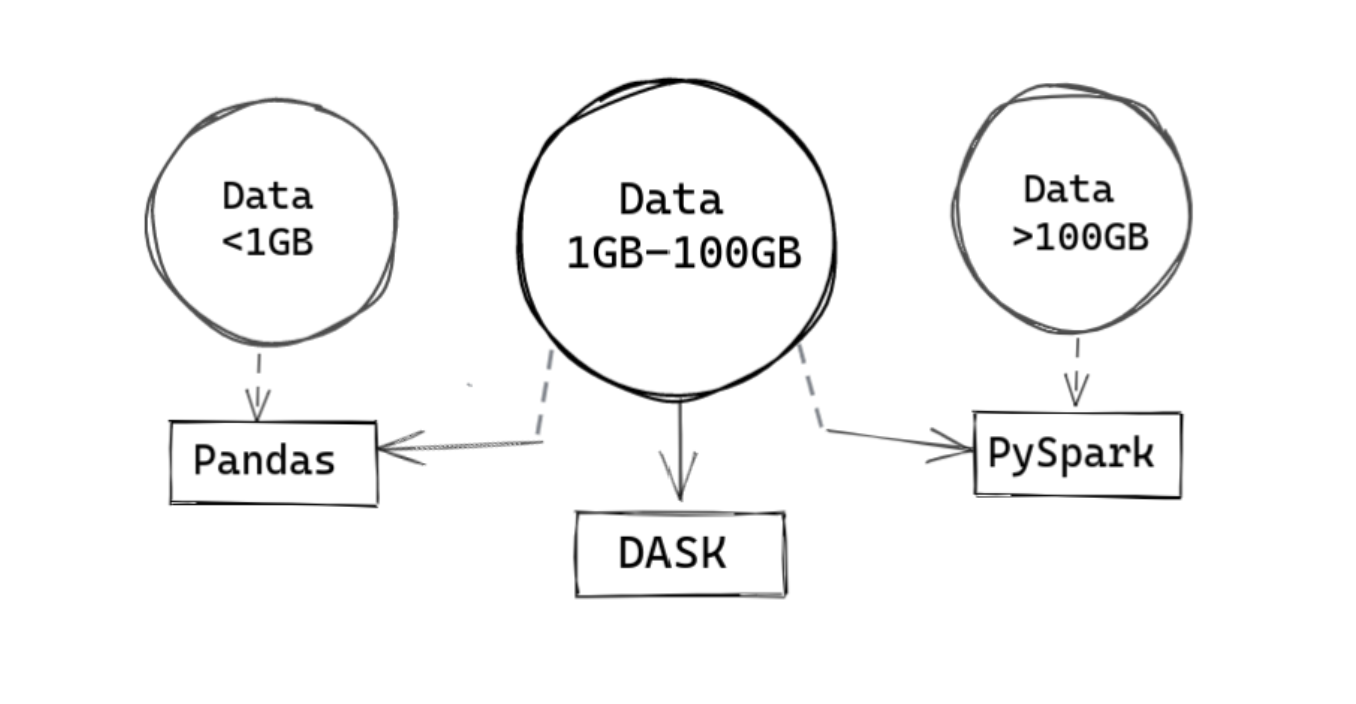

---
### QUELQUES REFERENCES

[Further Reading](https://pythonspeed.com/articles/indexing-pandas-sqlite/)

[Fast subsets of large datasets](https://pythonspeed.com/articles/pandas-reduce-memory-lossy/)

[Lossy compression](https://blog.esciencecenter.nl/irregular-data-in-pandas-using-c-88ce311cb9ef)


[Faster loading with python and c++](https://blog.esciencecenter.nl/irregular-data-in-pandas-using-c-88ce311cb9ef)

[ML ET DASK](https://www.machinelearningplus.com/python/dask-tutorial/)


---
